Estudo Dados Airbnb Rotterdam

In [182]:
#Import das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import datasets

#carregamento do Data_frame para o programa
calendar_df=pd.read_csv('Ficheiros_airbnb_Rotterdam\calendar.csv')
listings_df=pd.read_csv('Ficheiros_airbnb_Rotterdam\listings.csv')
listings_zipado_df=pd.read_csv('Ficheiros_airbnb_Rotterdam\listings zipado.csv')

In [183]:
#calendar_df.columns
##'listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights'

#preparar os dados e tirar os caracteres especiais
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

listings_zipado_df['price'] = listings_zipado_df['price'].replace('[\$,]', '', regex=True).astype(float)

Separar avaliação do 'name' do DataFram Listings

In [184]:
row = listings_df['name']

for index, palavra in enumerate(row):
    for indice, letra in enumerate(palavra):
        if letra =='★':
                if palavra[indice+1] != 'N' :
                    avaliacao = palavra[indice + 1: indice + 5]
                    listings_df.loc[index, 'avaliacao'] = float(avaliacao)
                    break;
                else:
                   # avaliacao = palavra[indice + 1: indice + 4]
                    avaliacao= float('NaN')
                    listings_df.loc[index, 'avaliacao'] = avaliacao
                    break;
        

Separar avaliação do 'name' do DataFram listings_zipado

In [185]:
row = listings_zipado_df['name']

for index, palavra in enumerate(row):
    for indice, letra in enumerate(palavra):
        if letra =='★':
                if palavra[indice+1] != 'N' :
                    avaliacao = palavra[indice + 1: indice + 5]
                    listings_zipado_df.loc[index, 'avaliacao'] = float(avaliacao)
                    break;
                else:
                   # avaliacao = palavra[indice + 1: indice + 4]
                    avaliacao= float('NaN')
                    listings_zipado_df.loc[index, 'avaliacao'] = avaliacao
                    break;
        

Estatistica Descritiva (Calendar)

Analise ao preço - Qual é a média de preços dos aluguéis no Airbnb na cidade?


In [186]:
row, columm = calendar_df.shape #mostra o número de linhas e o número de colunas
print(f"Ficheiro tem {row} Linhas e {columm} Colunas \n")

#Preço medio da estadia
price_mean = calendar_df['price'].mean()
print(f"O preço médio: {price_mean:.2f}$")

#Preço medio da estadia
price_min = calendar_df['price'].min()
print(f"O preço mais baixo: {price_min:.0f}$")

#Preço medio da estadia
price_max = calendar_df['price'].max()
print(f"O preço mais alto: {price_max:.0f}$")

#Preço medio da estadia
price_mode = calendar_df['price'].mode().values[0]
print(f"O preço mais aplicado: {price_mode:.0f}$")

#O coeficiente de assimetria da idade é: 7.212379118954113
# É positivo logo a cauda direita é mais longa comparada com a esquerda
price_assimetria = calendar_df['price'].skew()
print(f"O coeficiente de assimetria da idade é: {price_assimetria:.2f}")

#Cortose - distribuição dos preços é mais concentrada perto da media
#Pouca diversidade de preços, com certos preços muito baixos
price_curtose = calendar_df['price'].kurtosis()
print(f"O coeficiente de curtose da idade é: {price_curtose:.2f}")

Ficheiro tem 379600 Linhas e 7 Colunas 

O preço médio: 161.50$
O preço mais baixo: 20$
O preço mais alto: 10500$
O preço mais aplicado: 150$
O coeficiente de assimetria da idade é: 7.21
O coeficiente de curtose da idade é: 271.93


Estatistica Descritiva (Listings)

Valor medio Bairro - Quais são os bairros mais caros e mais baratos para alugar no Airbnb?


In [187]:
#Criar um DF agroupado por bairros com a media do Preço, é ordenado em ordem crescente (mais pequeno mais alto)
bairros_df = listings_df.groupby('neighbourhood_group')['price'].mean()
bairros_df=bairros_df.sort_values(ascending=True)

#Automatização de quantidade de cidades para mostrar
lista_top=5

print(f"top 5 dos preços mais baixos:")
for bairro, preço in bairros_df.head(lista_top).items():
    print(f"\t{bairro} : {preço:.2f}$")


print(f"\ntop 5 dos preços mais altos:")
for bairro, preço in bairros_df[-1:-(lista_top+1):-1].items():
    print(f"\t{bairro} : {preço:.2f}$")


print("\n\n")

#preço medio de cada bairro ordenado
for bairro, preço in bairros_df.items():
    print(f"O preço médio em {bairro} é de: {preço:.2f}$")

top 5 dos preços mais baixos:
	Botlek-Europoort-Maasvlakte : 80.00$
	Pernis : 90.00$
	Charlois : 106.65$
	Hoek van Holland : 119.82$
	Prins Alexander : 123.78$

top 5 dos preços mais altos:
	Hoogvliet : 816.67$
	Rozenburg : 199.00$
	Feijenoord : 176.01$
	Rotterdam Centrum : 174.80$
	Hillegersberg-Schiebroek : 162.13$



O preço médio em Botlek-Europoort-Maasvlakte é de: 80.00$
O preço médio em Pernis é de: 90.00$
O preço médio em Charlois é de: 106.65$
O preço médio em Hoek van Holland é de: 119.82$
O preço médio em Prins Alexander é de: 123.78$
O preço médio em Noord é de: 132.52$
O preço médio em Overschie é de: 132.65$
O preço médio em IJsselmonde é de: 144.56$
O preço médio em Waalhaven-Eemhaven é de: 147.00$
O preço médio em Kralingen-Crooswijk é de: 149.46$
O preço médio em Delfshaven é de: 149.69$
O preço médio em Hillegersberg-Schiebroek é de: 162.13$
O preço médio em Rotterdam Centrum é de: 174.80$
O preço médio em Feijenoord é de: 176.01$
O preço médio em Rozenburg é de: 199.

Room-type - Quais são os tipos de propriedades mais comuns

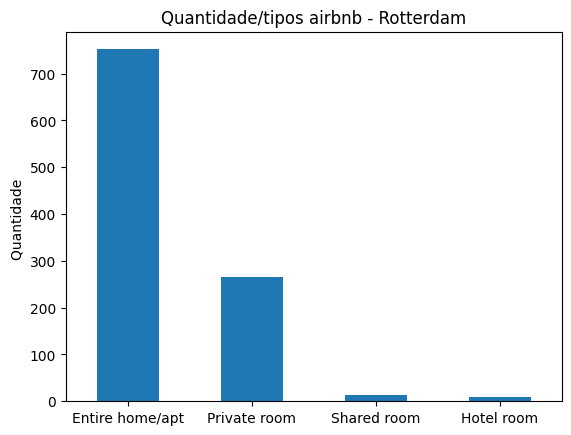

In [188]:
room_type=listings_df['room_type'].value_counts()
room_type

# Criando o gráfico de barras empilhadas
room_type.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Quantidade ')
plt.title('Quantidade/tipos airbnb - Rotterdam')
plt.xticks(rotation=0)  # Para manter os rótulos das categorias na horizontal
plt.show()


In [189]:
listings_zipado_df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avaliacao
0,73155,https://www.airbnb.com/rooms/73155,20230918144155,2023-09-18,city scrape,Rental unit in Rotterdam · ★4.95 · 1 bedroom ·...,This bright comfortable one bedroom apartment ...,The apartment is in a quiet side street of the...,https://a0.muscache.com/pictures/712479/b2531a...,381163,...,4.96,4.86,0599 D9BA 806A 9A56 BDBB,f,1,1,0,0,0.77,4.95
1,77592,https://www.airbnb.com/rooms/77592,20230918144155,2023-09-18,previous scrape,Rental unit in Rotterdam · ★4.78 · 1 bedroom ·...,<b>The space</b><br />Welcome to Rotterdam! <...,NaN,https://a0.muscache.com/pictures/e96512a1-b4c7...,416305,...,4.83,4.56,Exempt,f,1,1,0,0,0.12,4.78
2,101526,https://www.airbnb.com/rooms/101526,20230918144155,2023-09-18,city scrape,Condo in Rotterdam · ★4.83 · 1 bedroom · 1 bed...,<b>The space</b><br />The apartment was renova...,"Levendige jonge buurt. Bistro op de hoek, Veel...",https://a0.muscache.com/pictures/679013/0bb0d3...,531869,...,4.88,4.81,0599 51CC CA3A 88B0 CEF1,f,1,1,0,0,0.12,4.83
3,283124,https://www.airbnb.com/rooms/283124,20230918144155,2023-09-18,city scrape,Rental unit in Rotterdam · ★4.72 · 2 bedrooms ...,Complete 2 bedroom apartment in Rotterdam. <br...,Bakery (with some other basic shoppings) and s...,https://a0.muscache.com/pictures/104781ee-9f6e...,132430732,...,4.37,4.63,0599 8987 6E27 0035 1F55,f,1,1,0,0,1.37,4.72
4,539905,https://www.airbnb.com/rooms/539905,20230918144155,2023-09-18,city scrape,Condo in Rotterdam · ★4.92 · 1 bedroom · 1 bed...,<b>The space</b><br />Fully furnished light fi...,NaN,https://a0.muscache.com/pictures/6557859/860ad...,2652971,...,4.96,4.79,0599 F642 774A E974 C0A9,f,1,1,0,0,0.18,4.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,978152696454987784,https://www.airbnb.com/rooms/978152696454987784,20230918144155,2023-09-18,city scrape,Rental unit in Rotterdam · ★New · 1 bedroom · ...,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499358808,...,NaN,NaN,HILH7193FYU710G6FI67,f,4,1,2,1,NaN,NaN
1036,978275266721990389,https://www.airbnb.com/rooms/978275266721990389,20230918144155,2023-09-18,city scrape,Rental unit in Rotterdam · ★New · 1 bedroom · ...,Vanuit deze ideaal gelegen accommodatie kun je...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,36454337,...,NaN,NaN,059907E8433D000C9C04,f,1,1,0,0,NaN,NaN
1037,980130608467858999,https://www.airbnb.com/rooms/980130608467858999,20230918144155,2023-09-18,city scrape,Rental unit in Rotterdam · ★New · 1 bedroom · ...,Lovely & calm apartment in Rotterdam West-Cent...,Rotterdam West-center offers various to do:<br...,https://a0.muscache.com/pictures/miso/Hosting-...,27773853,...,NaN,NaN,0599 27A2 1D3E A89E FAAF,f,1,1,0,0,NaN,NaN
1038,981654772511634105,https://www.airbnb.com/rooms/981654772511634105,20230918144155,2023-09-18,city scrape,Cabin in Hoek van Holland · ★New · 3 bedrooms ...,Ontdek het ultieme uitje in ons 'houten famil...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,306305805,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN


In [190]:
listings_zipado_df=listings_zipado_df.drop('description', axis=1)
listings_zipado_df=listings_zipado_df.drop('listing_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('scrape_id', axis=1)
listings_zipado_df=listings_zipado_df.drop('last_scraped', axis=1)
listings_zipado_df=listings_zipado_df.drop('source', axis=1)
listings_zipado_df=listings_zipado_df.drop('picture_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('neighborhood_overview', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_name', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_acceptance_rate', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_thumbnail_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_picture_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_neighbourhood', axis=1)



"""
listing_url
scrape_id
last_scraped
source
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_verifications
host_has_profile_pic
host_identity_verified * (dá mais credibilidade)
neighbourhood_cleansed
neighbourhood_group_cleansed
bathrooms_text
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability,
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
license
calculated_host_listings_count
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
reviews_per_month
"""


#listings_zipado_df
#listings_zipado_df.info() #mostra informações sobre cada coluna

listings_zipado_df.columns

"""
review_scores_rating *
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
"""

'\nreview_scores_rating *\nreview_scores_accuracy\nreview_scores_cleanliness\nreview_scores_checkin\nreview_scores_communication\nreview_scores_location\nreview_scores_value\n'

outliers

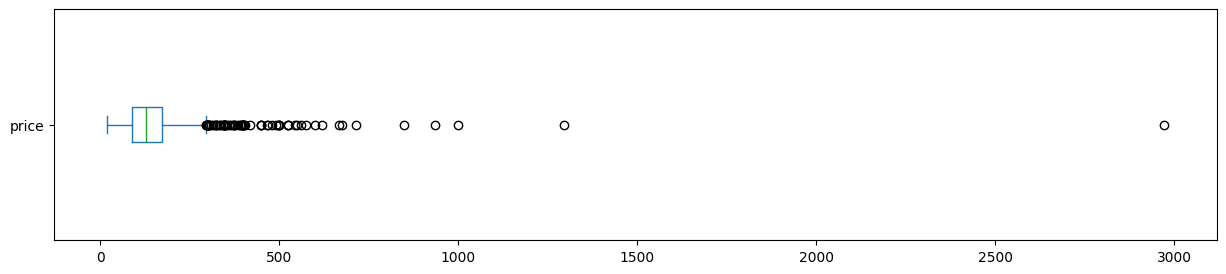

In [191]:
listings_zipado_df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

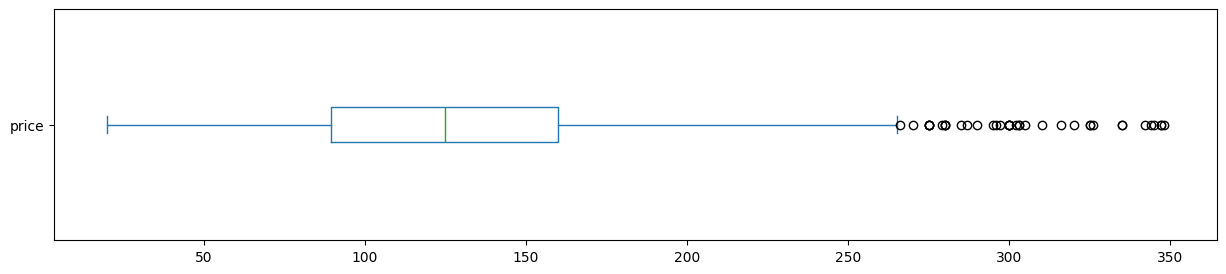

In [192]:
listings_zipado_df.price[listings_zipado_df.price < 350].plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

Distribuição do preço pela cidade

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


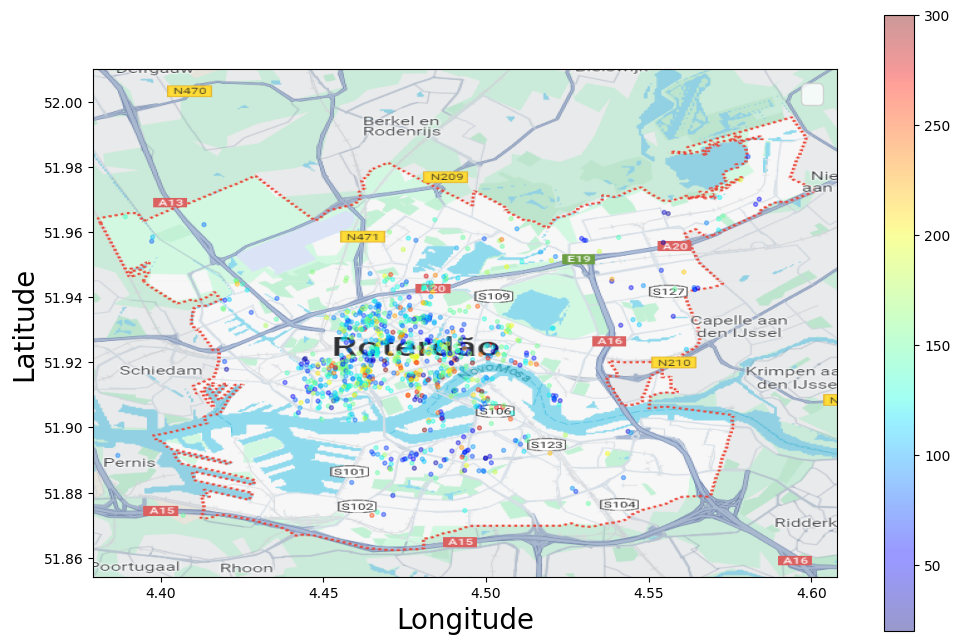

In [193]:
# importando a imagem
rottardam_map = mpimg.imread('Ficheiros_airbnb_Rotterdam/rottardam_map.png')

df_mapa = listings_zipado_df.copy()
df_mapa.drop(df_mapa[df_mapa.price > 300].index, axis = 0, inplace = True)

# plotando os dados do nosso DataFrame df_new, o qual removemos os outliers, e definir as cores de acordo com o preço
ax = df_mapa.plot(kind='scatter', x='longitude', y='latitude',
alpha=0.4, c=df_mapa['price'], s=8, cmap=plt.get_cmap('jet'),
figsize=(12,8));

# definindo as coordenadas dos extremos da imagem retirada do Google Maps
# a ordem é: Longitude do canto inferior esquerdo, longitude do superior direito, latitude do inferior esquerdo e latitude do superior direito
plt.imshow(rottardam_map, extent=[4.379184622427334, 4.60787004173257, 51.85411821554999, 52.010093074169326], alpha=1)

# adicionando os rótulos dos eixos
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# definindo os valores mínimos e máximos dos eixos, devem ser os mesmo que definimos acima

plt.xlim(4.379184622427334, 4.60787004173257)
plt.ylim(51.85411821554999, 52.010093074169326)

plt.legend(fontsize=20)
plt.show();